In [1]:
using Statistics
using StatsBase
using Distributions
using MultivariateStats
using DelimitedFiles
using GaussianMixtures
using Plots; gr();

In [2]:
prior, h = readdlm("../data/base/bsr_ignmajors_1.csv", ',', header=true);
huang_prior, h = readdlm("../data/huang/bsr_ignmajors_1.csv", ',', header=true);

In [113]:
comp = prior[:,2:11]
huang_comp = huang_prior[:,2:11]
comph = h[2:11]

10-element Vector{AbstractString}:
 "SiO2"
 "TiO2"
 "Al2O3"
 "FeO"
 "MgO"
 "CaO"
 "Na2O"
 "K2O"
 "H2O_Total"
 "CO2"

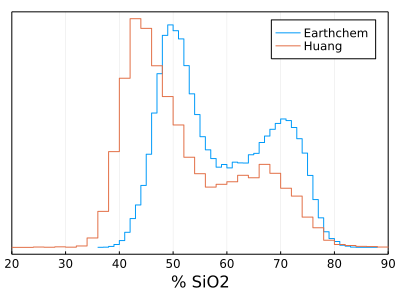

In [104]:
stephist(prior[:,2], normalize=:pdf, label="Earthchem")
stephist!(huang_prior[:,2], normalize=:pdf, label="Huang")
plot!(framestyle=:box, yticks=false, size=(400,300), xlims=(20,90), xlabel="% SiO2")

#savefig("../../thesis/figures/compare_priors.pdf")

In [5]:
pca_model = fit(PCA, comp')

PCA(indim = 10, outdim = 7, principalratio = 0.9937846284190507)

In [114]:
components = transform(pca_model, comp')
huang_components = transform(pca_model, huang_comp')

7×20000 Matrix{Float64}:
 15.5851   10.7479    13.9954    10.9604    …  22.4913    26.2098   26.6105
 -3.11306  -1.64417   -2.16501   -1.4481       30.5278    22.0627   31.168
  4.96512   1.17147    1.21736   -3.15706      -8.72654   -5.49591  -4.87598
 -1.27051   1.84032    1.26839    1.07901      -8.59788   -8.44062  -9.37166
  2.26872  -1.04699    1.90342   -0.951902     -1.47145    1.32686  -2.17318
  1.10164  -1.22524   -0.442118  -1.5365    …   0.626222   1.28103  -0.697722
  3.91739   0.879121   1.16147    0.798877      2.06938    6.22293   1.93804

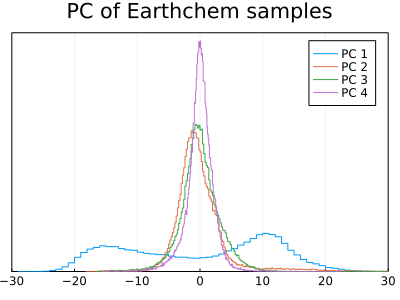

In [180]:
stephist(components[1,:], label="PC 1", normalize=:pdf)
for c in 2:4
    stephist!(components[c,:], label="PC $c", normalize=:pdf)
end 
plot!(xlims=(-30, 30), framestyle=:box, size=(400,300), ylims=(0,.28),yticks=false,
title="PC of Earthchem samples")
#savefig("../../thesis/figures/pc_plots.pdf")

In [109]:

pvar = principalvars(pca_model)./tvar(pca_model)
println(sum(pvar[1:4]))
pvar

0.9601354193340295


7-element Vector{Float64}:
 0.7732729076521977
 0.10728873799060282
 0.05372706829938338
 0.02584670539184566
 0.014434302857106231
 0.011822741882707887
 0.007392164345206995

In [9]:
printable = round.(projection(pca_model)', digits=3)
for row in 1:size(printable,1)
    for col in printable[row,:]
        print(col)
        print(" & ")
    end
    println(" \\\\")
end

-0.827 & 0.04 & -0.016 & 0.331 & 0.335 & 0.281 & -0.048 & -0.107 & 0.007 & 0.004 &  \\
0.245 & -0.05 & -0.559 & -0.061 & 0.758 & -0.168 & -0.135 & -0.022 & -0.006 & -0.002 &  \\
0.103 & 0.067 & -0.379 & 0.809 & -0.31 & -0.297 & -0.018 & 0.049 & -0.018 & -0.005 &  \\
0.278 & 0.001 & -0.314 & 0.055 & -0.18 & 0.791 & -0.148 & -0.36 & -0.108 & -0.016 &  \\
-0.189 & 0.065 & -0.406 & -0.24 & -0.244 & 0.156 & -0.264 & 0.605 & 0.463 & 0.054 &  \\
-0.076 & 0.031 & -0.197 & -0.117 & -0.095 & -0.141 & 0.417 & -0.54 & 0.667 & 0.048 &  \\
-0.153 & 0.233 & -0.376 & -0.203 & -0.098 & 0.042 & 0.669 & 0.178 & -0.467 & 0.176 &  \\


# Fit 10-D, 2 peak Gaussian Mixture model 

In [10]:
gm_model = MixtureModel(GMM(2, comp))

┌ Info: Initializing GMM, 2 Gaussians diag covariance 10 dimensions using 100000 data points
└ @ GaussianMixtures /Users/f0043n9/.julia/packages/GaussianMixtures/LQCWm/src/train.jl:79


K-means converged with 6 iterations (objv = 148804.56389399158)


┌ Info: K-means with 2000 data points using 6 iterations
│ 90.9 data points per parameter
└ @ GaussianMixtures /Users/f0043n9/.julia/packages/GaussianMixtures/LQCWm/src/train.jl:140


MixtureModel{DiagNormal}(K = 2)
components[1] (prior = 0.5744): DiagNormal(
dim: 10
μ: [51.270588613344444, 1.3447119071489855, 14.566852704277691, 10.197137251861603, 7.687787112401043, 8.663649946756118, 2.7405728453474922, 1.074528503544848, 1.8281527847626902, 0.6260183346376919]
Σ: [20.763704565207718 0.0 … 0.0 0.0; 0.0 0.9057098320111271 … 0.0 0.0; … ; 0.0 0.0 … 1.9063874975065798 0.0; 0.0 0.0 … 0.0 0.7261054606923987]
)

components[2] (prior = 0.4256): DiagNormal(
dim: 10
μ: [68.68788011022616, 0.4202851595678405, 14.617493439432018, 3.2567516737338273, 1.0291104347099531, 2.267171824326046, 3.7789230410751533, 3.597268653962879, 1.7818624469131996, 0.5632532138318528]
Σ: [27.206353608690733 0.0 … 0.0 0.0; 0.0 0.07015526721540304 … 0.0 0.0; … ; 0.0 0.0 … 1.8409187091276393 0.0; 0.0 0.0 … 0.0 0.5706912838323915]
)



66.97614041034336
53.01231776303262


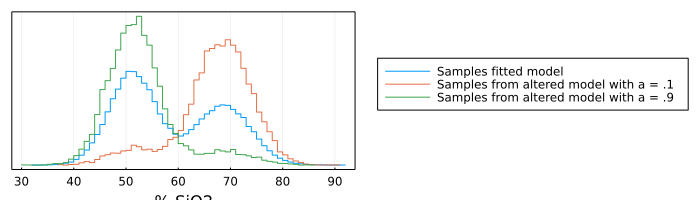

In [140]:
a = .1
new_model = MixtureModel(gm_model.components, [a, 1-a])
samples_new = rand(new_model, 10000)

a = .9
new_model = MixtureModel(gm_model.components, [a, 1-a])
samples_new_2 = rand(new_model, 10000)

sampled_comps = rand(gm_model,100000)
# Normalizing changes apparent match 
#sampled_comps = (sampled_comps ./ sum(sampled_comps,dims=1)).*100

stephist(sampled_comps[1,:],normalize=:pdf, label="Samples fitted model")
stephist!(samples_new[1,:],normalize=:pdf, label="Samples from altered model with a = .1")
stephist!(samples_new_2[1,:],normalize=:pdf, label="Samples from altered model with a = .9")
#stephist!(comp[:,1], normalize=:pdf, label="Data")

println(mean(samples_new[1,:]))
println(a*new_model.components[1].μ[1] + (1-a)*new_model.components[2].μ[1])

plot!(legend=:outerright, framestyle=:box, yticks=false, size=(700, 200), xlabel="% SiO2")

In [78]:
means = []
for i in 1:100000
    a = rand()
    new_model = MixtureModel(gm_model.components, [a, 1-a])
    append!(means, a*new_model.components[1].μ[1] + (1-a)*new_model.components[2].μ[1])
end

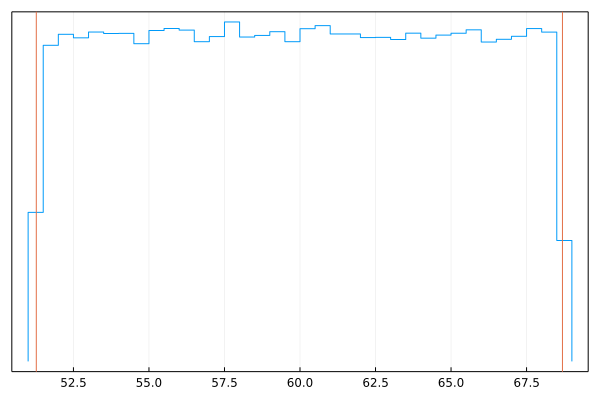

In [84]:
stephist(means, normalize=:pdf, yticks=false, framestyle=:box, legend=false)
vline!([new_model.components[1].μ[1], new_model.components[2].μ[1]])

In [13]:
# given vp, vs in km/s, rho in kg/m^3, return mu and ks in bar 
function ks_mu(rho, vp, vs)
    mu = rho*(1000*vs)^2
    ks = rho*(1000*vp)^2 - (4/3)*mu 
    return ks/100000, mu/100000 # convert from Pa to Bar 
end 

ks_mu (generic function with 1 method)

In [51]:
pdf(gm_model, comp[1,:])/pdf(new_model, comp[1,:])

0.7054771088211668

In [158]:
println(join(round.(gm_model.components[1].μ, digits=2), " & "))
println(join(round.(gm_model.components[2].μ, digits=2), " & "))

println(join(round.(gm_model.components[1].Σ, digits=2), " & "))
println()
println(join(round.(gm_model.components[2].Σ, digits=2), " & "))

51.27 & 1.34 & 14.57 & 10.2 & 7.69 & 8.66 & 2.74 & 1.07 & 1.83 & 0.63
68.69 & 0.42 & 14.62 & 3.26 & 1.03 & 2.27 & 3.78 & 3.6 & 1.78 & 0.56
20.76 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.91 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 11.95 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 13.21 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 29.61 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 7.83 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.66 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.44 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.91 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.73

27.21 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.07 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 4.25 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 6.35 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0

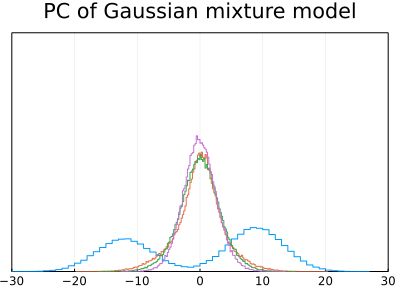

In [178]:
sampled_pca = transform(pca_model, sampled_comps)

stephist(sampled_pca[1,:], label="PC 1", normalize=:pdf)
for c in 2:4
    stephist!(sampled_pca[c,:], label="PC $c", normalize=:pdf)
end 
plot!(xlims=(-30, 30),framestyle=:box, yticks=false, size=(400,300), legend=false, 
    title="PC of Gaussian mixture model", ylims=(0,.28))
#savefig("../../thesis/figures/pc_mixture_model.pdf")

In [167]:
gm_model.prior.p

2-element Vector{Float64}:
 0.5744415211066206
 0.4255584788933794

In [73]:
r = rand(10)
write("test1.lo", join(r, "\n "))


196